In [1]:
%pwd

'/nfs/home/zle2435/dl_proj/notebook'

checking original data (sampled)

In [2]:
img_path = r'../data/filtered/train/'
img_csv_path = r'../data/filtered/train.csv'

In [3]:
import pandas as pd
df = pd.read_csv(img_csv_path)
df.head()

,image_name,annotation
0,00001.jpg,NaN
1,00002.jpg,NaN
2,00003.jpg,NaN
3,00004.jpg,NaN
4,00005.jpg,0 2076 1559 2369 1695


In [4]:
def conv_str2annot(anno):
    """split string to list of coordinates"""
    anno_str_list = anno.split(' ')[1:5] # x1, y1, x2, y2
    return [int(s) for s in anno_str_list]

def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

(3072, 2560, 3)
image read: 00005.jpg
coordinate: [2076, 1559, 2369, 1695]


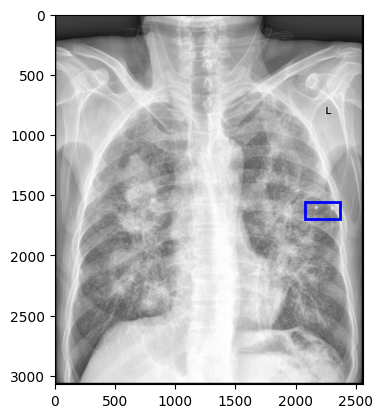

(3065, 2552, 3)
image read: 00006.jpg
coordinate: [1368, 2587, 1692, 3039]


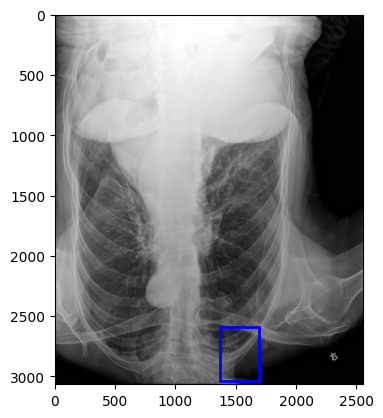

(3072, 3072, 3)
image read: 00007.jpg
coordinate: [944, 188, 2064, 806]


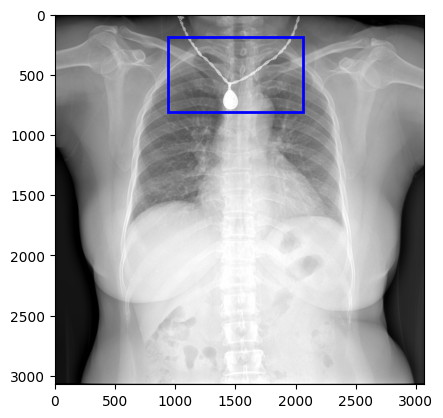

(2829, 2752, 3)
image read: 00008.jpg
coordinate: [730, 1720, 1897, 2673]


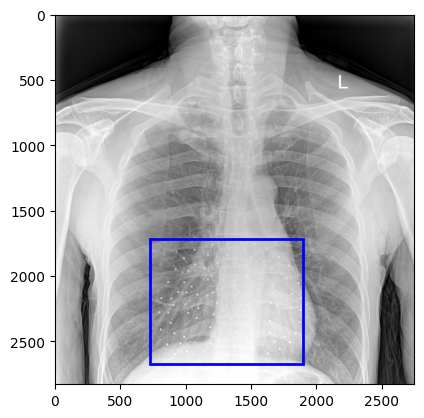

(2660, 2180, 3)
image read: 00009.jpg
coordinate: [847, 1346, 1345, 1877]


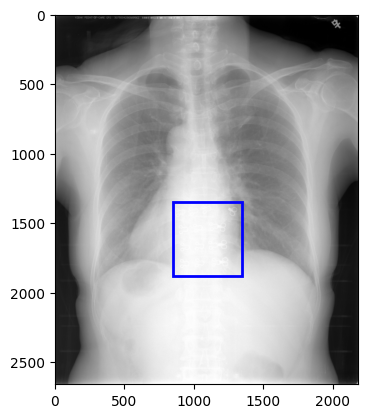

(2627, 2129, 3)
image read: 00011.jpg
coordinate: [1039, 74, 1248, 1288]


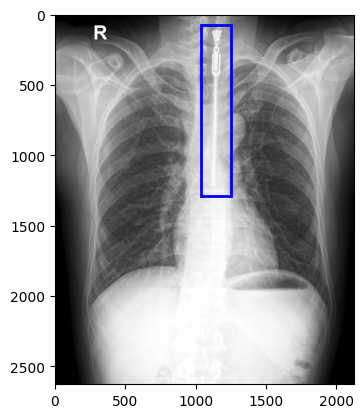

(3065, 2552, 3)
image read: 00013.jpg
coordinate: [2045, 1415, 2324, 1594]


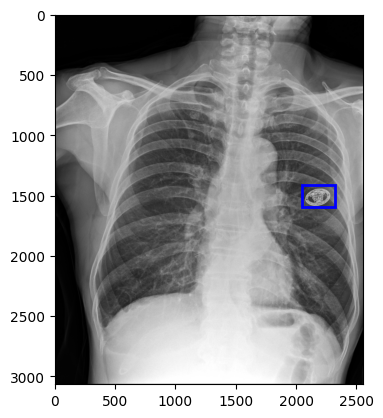

(3052, 3052, 3)
image read: 00015.jpg
coordinate: [1282, 36, 2307, 584]


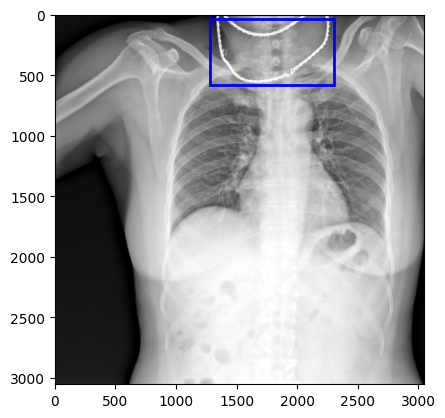

(2480, 2172, 3)
image read: 00017.jpg
coordinate: [1221, 186, 1472, 511]


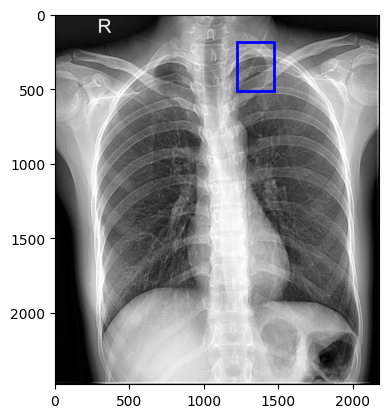

(2854, 2991, 3)
image read: 00021.jpg
coordinate: [1344, 715, 1575, 1089]


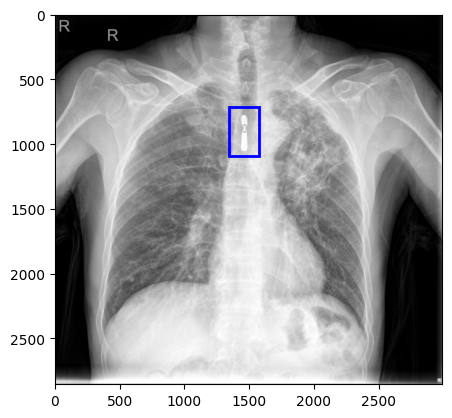

(2288, 2784, 3)
image read: 00022.jpg
coordinate: [772, 80, 1207, 446]


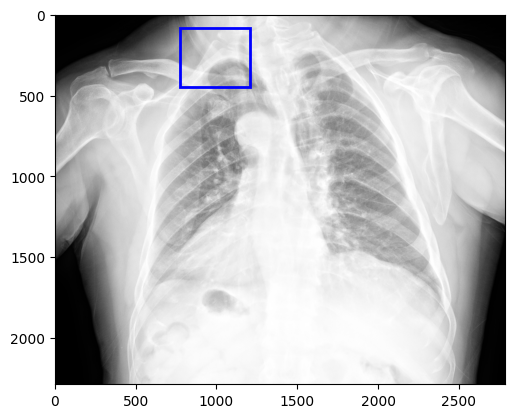

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

#####################
count = 0
count_end = 10
#####################

for i in range(len(df)):
    if isinstance(df['annotation'][i], float) or count > count_end:
        continue
    image_name = df['image_name'][i]
    image_path = os.path.join(img_path, image_name)
    image = cv2.imread(image_path, (cv2.COLOR_RGB2GRAY))
    print(image.shape)
    print(f'image read: {image_name}')
    coordinate = conv_str2annot(df['annotation'][i])
    print(f'coordinate: {coordinate}')
    fig = plt.imshow(image)
    fig.axes.add_patch(bbox_to_rect(coordinate, 'blue'))
    plt.show()
    count += 1
    